<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.2_SVD/3.2_3_spectral_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

---
# Spectral theory of matrices
---

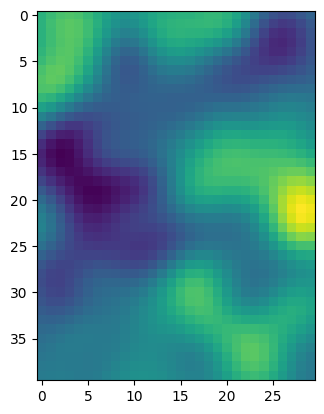

In [2]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

<ipython-input-6-e06d8e409b1f>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241)


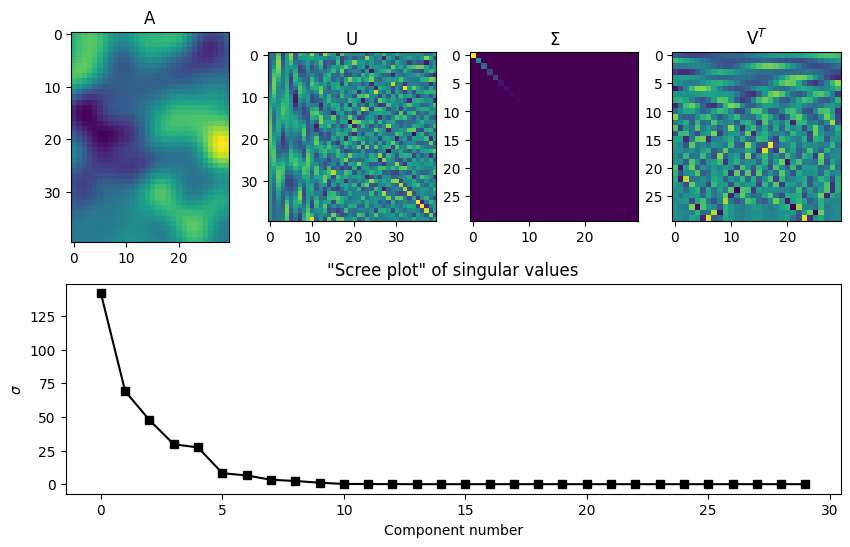

In [6]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

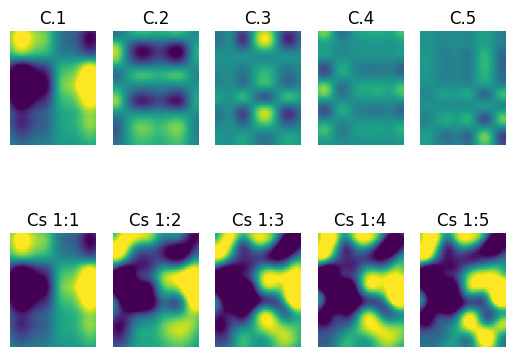

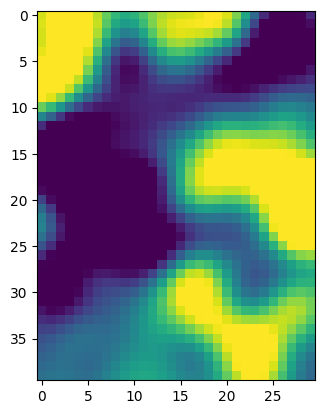

In [7]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):

    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )

    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))

    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()